In [1]:
from numpy.fft import fft, ifft, hfft
from scipy.signal import lfilter
from scipy.io import wavfile
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sounddevice as sd
from IPython.display import Audio
from scipy import signal
from helpers import *

figsize=(10,5)
linewidth=2.5
matplotlib.rcParams.update({'font.size': 16})

In [2]:
fs = 44100
time = np.linspace(0, 2, 2*fs)
samples = np.arange(2*fs)
fourier = np.linspace(0, .2*np.pi, 2*fs)

# Digital and additive synthesis

## Sine wave

In [3]:
def sine(A, w, phi, n):
    return A * np.sin(w*n - phi)

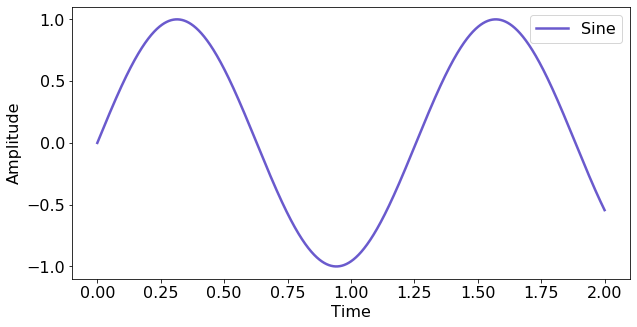

In [4]:
plt.figure(figsize=figsize)
plt.plot(time, sine(1, 5, 0, time), linewidth=linewidth,color="slateblue",  label="Sine")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc='upper right')
plt.savefig("sine.pdf" ,bbox_inches='tight')
plt.show()

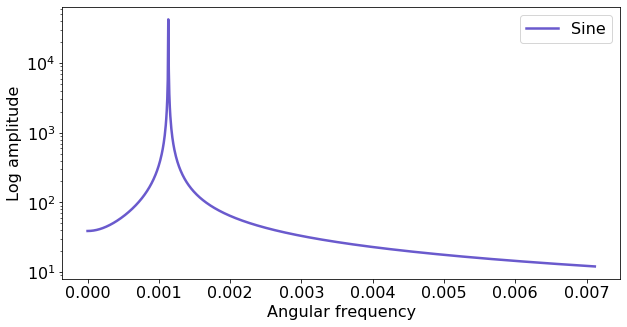

In [222]:
plt.figure(figsize=figsize)
plt.plot(fourier[:1000], np.abs(fft(sine(1, 500, 0, time)))[:1000], linewidth=linewidth,color="slateblue",  label="Sine")
plt.xlabel("Angular frequency")
plt.ylabel("Log amplitude")
plt.yscale("log")
plt.legend(loc='upper right')
plt.savefig("sine_fft.pdf",bbox_inches='tight')
plt.show()

In [180]:
sine1 = sine(1, 0.05, 0, samples)
wavfile.write('samples/sine.wav', fs, (0x7FFF * sine1).astype(np.int16))
Audio("samples/sine.wav", autoplay=False)

## Square wave

In [181]:
def square(A, w, phi, n):
    return A*np.sign( np.sin( w*n - phi))

def square_sin(A, w, phi, n, order=20):
    out = 0
    for k in range(1, order):
        out += np.sin((2*k-1)*w*n - phi)/(2*k-1)
        
    return 4*A/np.pi * out

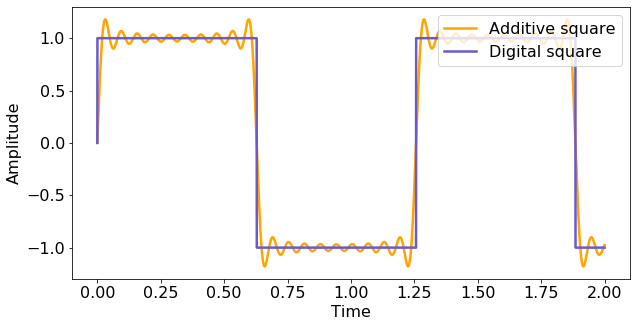

In [205]:
plt.figure(figsize=figsize)
plt.plot(time, square_sin(1, 5, 0, time, order=11), linewidth=linewidth, color="orange", label="Additive square")
plt.plot(time, square(1, 5, 0, time), linewidth=linewidth, color="slateblue", label="Digital square")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc='upper right')
plt.savefig("square.pdf",bbox_inches='tight')
plt.show()

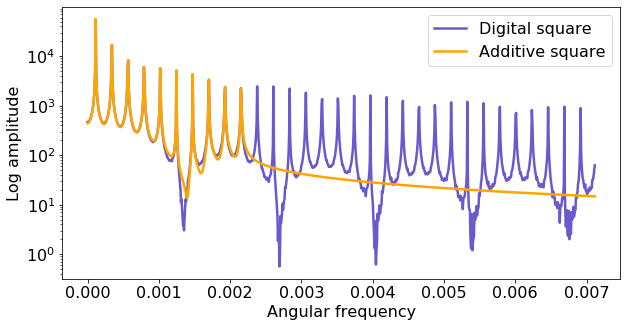

In [223]:
plt.figure(figsize=figsize)
plt.plot(fourier[:1000], np.abs(fft(square(1, 50, 0, time)))[:1000], linewidth=linewidth,color="slateblue",  label="Digital square")
plt.plot(fourier[:1000], np.abs(fft(square_sin(1, 50, 0, time, order=11)))[:1000], linewidth=linewidth, color="orange", label="Additive square")
plt.xlabel("Angular frequency")
plt.ylabel("Log amplitude")
plt.yscale("log")
plt.legend(loc='upper right')
plt.savefig("square_fft.pdf",bbox_inches='tight')
plt.show()

In [184]:
square1 = square(1, 0.05, 0, samples)
wavfile.write('samples/square.wav', fs, (0x7FFF * square1).astype(np.int16))
Audio("samples/square.wav", autoplay=False)

## Triangle wave

In [185]:
def triangle(A, w, phi, n):
    return 2*A/np.pi * np.arcsin( np.sin( w*n - phi))

def triangle_sin(A, w, phi, n, order=20):
    out = 0
    for k in range(order):
        out += (-1)**k/(2*k+1)**2 * np.sin( (2*k+1)* w*n - phi )
        
    return 8*A/np.pi**2 * out

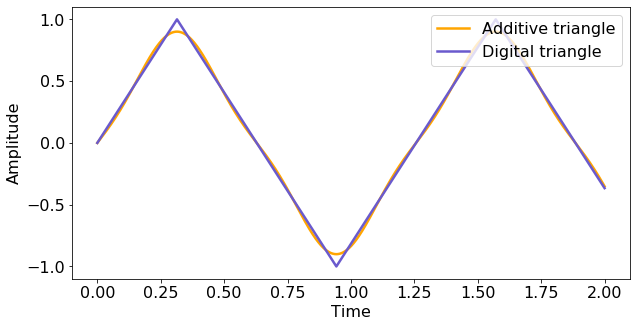

In [211]:
plt.figure(figsize=figsize)
plt.plot(time, triangle_sin(1, 5, 0, time, order=2), linewidth=linewidth, color="orange", label="Additive triangle")
plt.plot(time, triangle(1, 5, 0, time), linewidth=linewidth, color="slateblue", label="Digital triangle")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc='upper right')
plt.savefig("triangle.pdf",bbox_inches='tight')
plt.show()

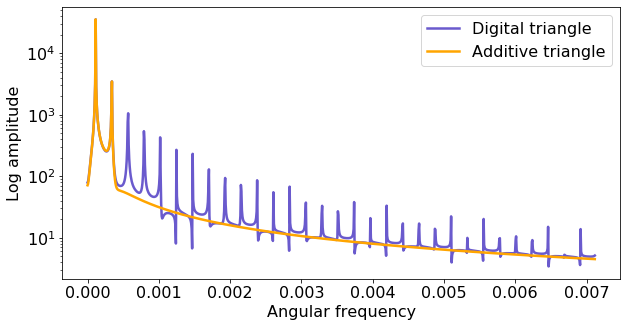

In [224]:
plt.figure(figsize=figsize)
plt.plot(fourier[:1000], np.abs(fft(triangle(1, 50, 0, time)))[:1000], linewidth=linewidth, color="slateblue", label="Digital triangle")
plt.plot(fourier[:1000], np.abs(fft(triangle_sin(1, 50, 0, time, order=2)))[:1000], linewidth=linewidth, color="orange", label="Additive triangle")
plt.xlabel("Angular frequency")
plt.ylabel("Log amplitude")
plt.yscale("log")
plt.legend(loc='upper right')
plt.savefig("triangle_fft.pdf",bbox_inches='tight')
plt.show()

In [188]:
tri1 = triangle(1, 0.05, 0, samples)
wavfile.write('samples/triangle.wav', fs, (0x7FFF * tri1).astype(np.int16))
Audio("samples/triangle.wav", autoplay=False)

## Sawtooth wave

In [189]:
def saw(A, w, phi, n):
    return 2*A/np.pi * np.arctan( np.tan( w*n/2 - phi))

def saw_sin(A, w, phi, n, order=20):
    out = 0
    for k in range(1, order):
        out += (-1)**k/k * np.sin( k*w*n - phi )
        
    return - 2* A/np.pi * out

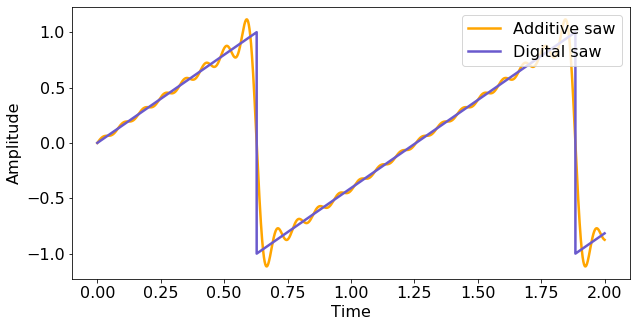

In [212]:
plt.figure(figsize=figsize)
plt.plot(time, saw_sin(1, 5, 0, time, order=16), linewidth=linewidth, color="orange", label="Additive saw")
plt.plot(time, saw(1, 5, 0, time), linewidth=linewidth, color="slateblue", label="Digital saw")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc='upper right')
plt.savefig("saw.pdf",bbox_inches='tight')
plt.show()

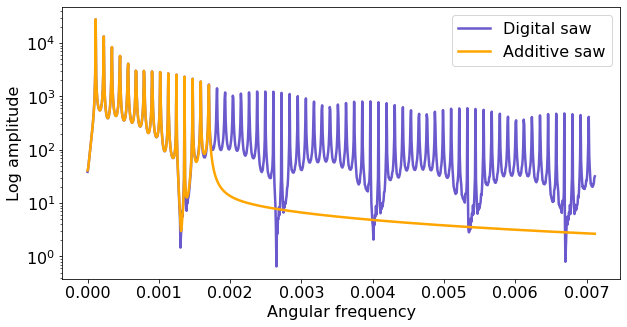

In [225]:
plt.figure(figsize=figsize)
plt.plot(fourier[:1000], np.abs(fft(saw(1, 50, 0, time)))[:1000], linewidth=linewidth, color="slateblue", label="Digital saw")
plt.plot(fourier[:1000], np.abs(fft(saw_sin(1, 50, 0, time, order=16)))[:1000], linewidth=linewidth, color="orange", label="Additive saw")
plt.xlabel("Angular frequency")
plt.ylabel("Log amplitude")
plt.yscale("log")
plt.legend(loc='upper right')
plt.savefig("saw_fft.pdf",bbox_inches='tight')
plt.show()

In [161]:
saw1 = saw(1, 0.05, 0, samples)
wavfile.write('samples/saw.wav', fs, (0x7FFF * saw1).astype(np.int16))
Audio("samples/saw.wav", autoplay=False)

# FM synthesis

In [31]:
def modulator(cw, cA, mod_signal, mod_index=1, oversampling_rate=8):
    """
    Block modulating a sine carrier with 
    - ang frequency cw, and 
    - amplitude cA, with the 
    - arbitrary signal mod_signal.
    Both must have the same length.
    """
    over = oversample(mod_signal, oversampling_rate)
    modulated = np.array([cA * np.sin(cw*i/oversampling_rate + mod_index*2.*np.pi*over[i]) for i in range(over.size)])
    return undersample(modulated, oversampling_rate)

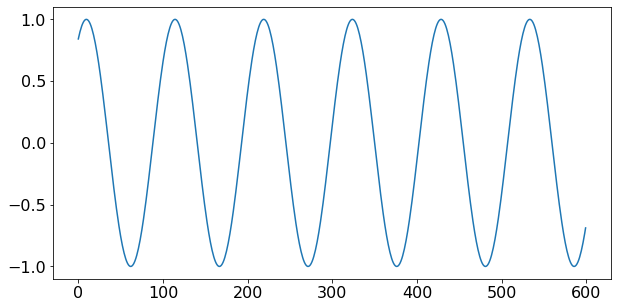

In [32]:
sine1 = sine(A=1, w=0.06, phi=-1, n=np.arange(2*fs, dtype=np.float32))
plt.figure(figsize=figsize)
plt.plot(sine1[:600])
wavfile.write('samples/sine1.wav', fs, (0x7FFF * sine1).astype(np.int16))
Audio("samples/sine1.wav", autoplay=False)

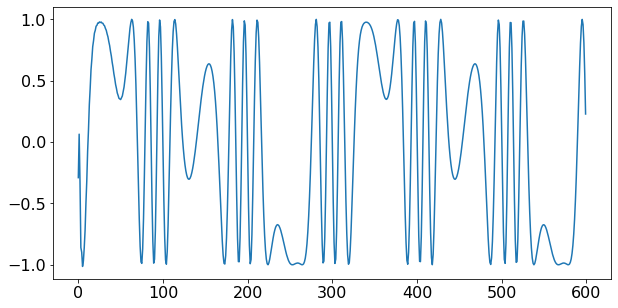

In [35]:
sine2 = modulator(0.2, 1, sine1, mod_index=.7)
plt.figure(figsize=figsize)
plt.plot(sine2[:600])
wavfile.write('samples/sine2.wav', fs, (0x7FFF * sine2).astype(np.int16))
Audio("samples/sine2.wav", autoplay=False)

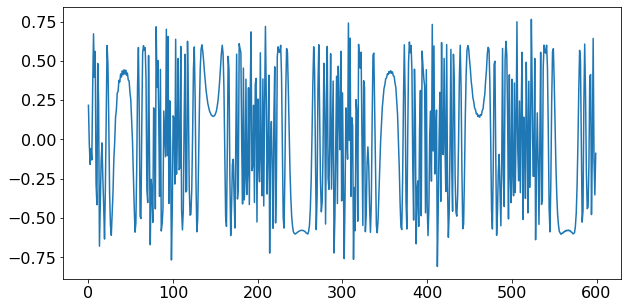

In [34]:
sine3 = modulator(.04, .6, sine2, mod_index=.9)
plt.figure(figsize=figsize)
plt.plot(sine3[:600])
wavfile.write('samples/sine3.wav', fs, (0x7FFF * sine3).astype(np.int16))
Audio("samples/sine3.wav", autoplay=False)

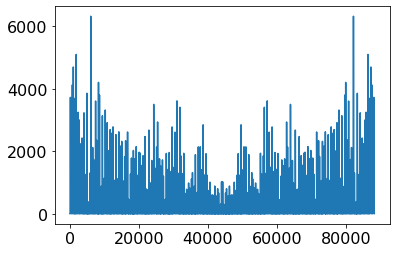

In [14]:
plt.plot(np.abs(fft(sine3)))

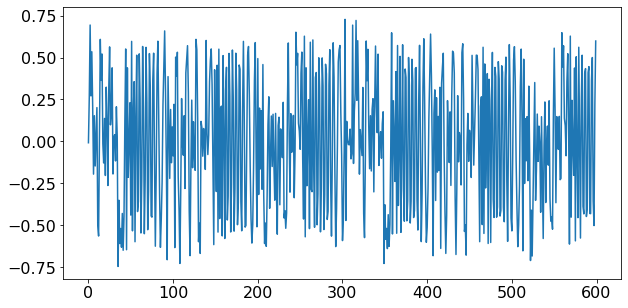

In [29]:
sine3 = undersample( modulator(.2, .6, oversample(sine2), mod_index=.9) )
plt.figure(figsize=figsize)
plt.plot(sine3[:600])
wavfile.write('samples/sine3.wav', fs, (0x7FFF * sine3).astype(np.int16))
Audio("samples/sine3.wav", autoplay=False)

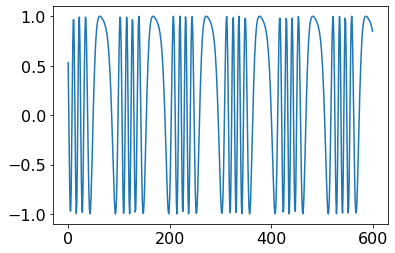

In [24]:
plt.plot(undersample(oversample(sine2))[0:600])